In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
transports = xr.Dataset(
    {
        "Qx": (("time", "lat", "lon"), np.random.normal(size=(9, 50, 50)) + 2.0 + np.linspace(0, 1, 9)[:, np.newaxis, np.newaxis]),
        "Qy": (("time", "lat", "lon"), np.random.normal(size=(9, 50, 50)) + 0.0 + 0.2 * np.linspace(1, -1, 9)[:, np.newaxis, np.newaxis]),
    },
    coords={
        "lon": np.linspace(0, 100, 50),
        "lat": np.linspace(-50, 50, 50),
        "time": np.arange(9) * np.timedelta64(1, "Y") + np.datetime64("2000"),
    }
)
transports

/tmp/ipykernel_1770/619933171.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  transports = xr.Dataset(


<xarray.Dataset>
Dimensions:  (time: 9, lat: 50, lon: 50)
Coordinates:
  * lon      (lon) float64 0.0 2.041 4.082 6.122 ... 93.88 95.92 97.96 100.0
  * lat      (lat) float64 -50.0 -47.96 -45.92 -43.88 ... 43.88 45.92 47.96 50.0
  * time     (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2008-01-01
Data variables:
    Qx       (time, lat, lon) float64 0.7909 2.549 4.659 ... 4.005 4.089 3.017
    Qy       (time, lat, lon) float64 0.3061 0.4971 -0.5887 ... 1.133 0.777

In [3]:
line_lons = [22, 39, 41]
line_lats = [38.5, 0.1, -40.2]

In [4]:
line_lons_lowres = xr.DataArray(line_lons, dims=("l", ), coords={"l": np.arange(3)})
line_lats_lowres = xr.DataArray(line_lats, dims=("l", ), coords={"l": np.arange(3)})

In [5]:
n_highres = 100  # make sure to have finer resolution than transport grid
line_lons_highres = line_lons_lowres.interp(l=np.linspace(0, 2, n_highres))
line_lats_highres = line_lats_lowres.interp(l=np.linspace(0, 2, n_highres))

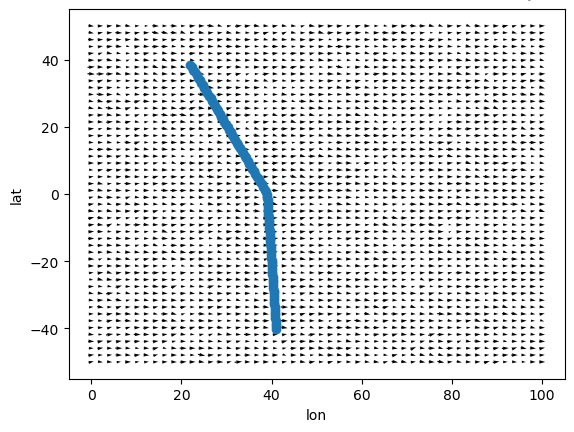

In [6]:
transports.mean("time").plot.quiver(
    x="lon", y="lat",
    u="Qx", v="Qy",
)
plt.plot(line_lons_highres, line_lats_highres, 'o-')

In [7]:
transports_line = transports.sel(lon=line_lons_highres, lat=line_lats_highres, method="nearest")
# check that selected _repeats_ (lon, lat) locations. Otherwise, resolution is too low.
transports_line

<xarray.Dataset>
Dimensions:  (time: 9, l: 100)
Coordinates:
    lon      (l) float64 22.45 22.45 22.45 22.45 ... 40.82 40.82 40.82 40.82
    lat      (l) float64 37.76 37.76 37.76 35.71 ... -37.76 -37.76 -39.8 -39.8
  * time     (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2008-01-01
  * l        (l) float64 0.0 0.0202 0.0404 0.06061 ... 1.939 1.96 1.98 2.0
Data variables:
    Qx       (time, l) float64 0.2805 0.2805 0.2805 ... 3.264 0.9797 0.9797
    Qy       (time, l) float64 1.04 1.04 1.04 -1.049 ... 1.094 -0.9177 -0.9177

# line directions

- interior points: average forward and backward diffs
- start / end of line: use forward / backward diffs

In [8]:
# forward line directions
lon_diffs_fwd = (line_lons_highres.shift(l=-1) - line_lons_highres)
lon_diffs_bwd = (line_lons_highres - line_lons_highres.shift(l=1))

lon_diffs = (
    lon_diffs_fwd.fillna(0) + lon_diffs_bwd.fillna(0)
) / (
    2 
    - lon_diffs_fwd.isnull().astype(float) 
    - lon_diffs_bwd.isnull().astype(float)
)


lat_diffs_fwd = line_lats_highres.shift(l=-1) - line_lats_highres
lat_diffs_bwd = line_lats_highres - line_lats_highres.shift(l=1)


lat_diffs = (
    lat_diffs_fwd.fillna(0) + lat_diffs_bwd.fillna(0)
) / (
    2 
    - lat_diffs_fwd.isnull().astype(float) 
    - lat_diffs_bwd.isnull().astype(float)
)


In [9]:
lat_diffs

<xarray.DataArray (l: 100)>
array([-0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.77575758,
       -0.77575758, -0.77575758, -0.77575758, -0.77575758, -0.78535354,
       -0.80454545, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141,
       -0.81414141, -0.81414141, -0.81414141, -0.81414141, -0.81414141])
Coordinates:
  * l        (l) float64 0.0 0.0202 0.0404 0.06061 ... 1.939 1.96 1.98 2.0

In [10]:
lhat_lon = lon_diffs / (lon_diffs ** 2 + lat_diffs ** 2) ** 0.5
lhat_lat = lat_diffs / (lon_diffs ** 2 + lat_diffs ** 2) ** 0.5

In [11]:
line_dists = 111e3 * (
    lat_diffs ** 2 
    + (np.cos(np.deg2rad(line_lats_highres)) * lon_diffs) ** 2
) ** 0.5
line_dists

<xarray.DataArray (l: 100)>
array([91130.90253007, 91235.68837614, 91339.6212557 , 91442.62799963,
       91544.63633327, 91645.57491899, 91745.37339766, 91843.96242892,
       91941.27373031, 92037.24011526, 92131.7955299 , 92224.87508877,
       92316.41510941, 92406.35314585, 92494.62802094, 92581.17985769,
       92665.95010946, 92748.88158914, 92829.91849725, 92909.00644903,
       92986.09250055, 93061.12517375, 93134.05448054, 93204.8319459 ,
       93273.41063011, 93339.74514991, 93403.79169882, 93465.50806654,
       93524.85365744, 93581.78950817, 93636.2783044 , 93688.2843967 ,
       93737.77381562, 93784.71428583, 93829.07523962, 93870.82782938,
       93909.94493949, 93946.40119728, 93980.17298324, 94011.23844058,
       94039.57748386, 94065.17180699, 94088.00489045, 94108.06200778,
       94125.33023137, 94139.79843745, 94151.45731045, 94160.29934664,
       94166.31885696, 92098.28815451, 90230.54214987, 90480.87253621,
       90480.78832369, 90480.65933223, 90480.4856658 , 90480.26746439,
       90480.00490391, 90479.69819601, 90479.34758792, 90478.95336228,
       90478.5158369 , 90478.03536448, 90477.51233236, 90476.9471622 ,
       90476.34030964, 90475.69226392, 90475.0035475 , 90474.27471567,
       90473.50635605, 90472.69908815, 90471.85356287, 90470.97046198,
       90470.05049756, 90469.09441144, 90468.10297461, 90467.07698658,
       90466.01727475, 90464.92469377, 90463.80012479, 90462.64447482,
       90461.45867598, 90460.24368471, 90459.00048107, 90457.73006789,
       90456.43347001, 90455.11173345, 90453.76592451, 90452.397129  ,
       90451.00645132, 90449.59501356, 90448.16395463, 90446.71442932,
       90445.24760736, 90443.76467254, 90442.26682166, 90440.75526366,
       90439.23121858, 90437.6959166 , 90436.15059706, 90434.59650746])
Coordinates:
  * l        (l) float64 0.0 0.0202 0.0404 0.06061 ... 1.939 1.96 1.98 2.0

## Projection

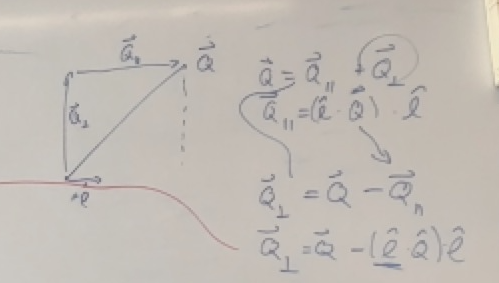

In [12]:
Q_paralllel = lhat_lon * transports_line.Qx + lhat_lat * transports_line.Qy
Q_across = (transports_line.Qx ** 2 + transports_line.Qy ** 2 - Q_paralllel ** 2) ** 0.5
Q_across

<xarray.DataArray (time: 9, l: 100)>
array([[0.67755585, 0.67755585, 0.67755585, 0.35777661, 0.35777661,
        2.80840754, 2.80840754, 2.80840754, 1.56038281, 1.56038281,
        1.56038281, 1.06695924, 1.06695924, 1.69562628, 1.69562628,
        1.69562628, 2.60082767, 2.54953207, 2.54953207, 1.49164002,
        1.49164002, 3.01391008, 3.01391008, 0.15777033, 2.11130022,
        2.11130022, 2.97946566, 2.97946566, 2.97946566, 0.88531143,
        0.88531143, 0.88531143, 3.05906823, 3.05906823, 1.58729299,
        1.58729299, 1.58729299, 1.23541255, 1.23541255, 1.23541255,
        1.27872269, 1.27872269, 3.63104352, 3.63104352, 3.63104352,
        1.83812131, 2.60833648, 1.55884175, 1.55884175, 1.63362972,
        1.09938397, 1.16711294, 1.16711294, 3.50591135, 3.50591135,
        2.314732  , 2.314732  , 2.314732  , 2.03119508, 2.03119508,
        2.25647233, 2.25647233, 2.25647233, 1.9626837 , 1.9626837 ,
        0.88041216, 0.88041216, 0.88041216, 2.66617366, 2.66617366,
        1.86094631, 1.86094631, 1.86094631, 2.84393329, 2.84393329,
        2.78131151, 2.78131151, 2.78131151, 2.66723797, 2.66723797,
        2.47577985, 2.47577985, 2.47577985, 4.66673276, 4.66673276,
        2.90082079, 2.90082079, 2.90082079, 2.16964207, 2.16964207,
        1.50615219, 1.50615219, 1.50615219, 0.30152797, 0.30152797,
        2.35672508, 2.35672508, 2.35672508, 1.84353497, 1.84353497],
...
       [1.86275094, 1.86275094, 1.86275094, 1.90007174, 1.90007174,
        3.55814973, 3.55814973, 3.55814973, 1.11847408, 1.11847408,
        1.11847408, 2.85577497, 2.85577497, 3.28107659, 3.28107659,
        3.28107659, 4.19365896, 2.60545316, 2.60545316, 2.59071495,
        2.59071495, 0.88882023, 0.88882023, 1.30041821, 2.77744082,
        2.77744082, 3.92795   , 3.92795   , 3.92795   , 2.21324518,
        2.21324518, 2.21324518, 2.72848511, 2.72848511, 2.98743244,
        2.98743244, 2.98743244, 0.02512737, 0.02512737, 0.02512737,
        3.40943977, 3.40943977, 3.02444166, 3.02444166, 3.02444166,
        3.44163882, 3.29007495, 2.00203624, 2.00203624, 2.14201466,
        4.22649817, 4.38846542, 4.38846542, 3.95929054, 3.95929054,
        3.0961597 , 3.0961597 , 3.0961597 , 2.6882536 , 2.6882536 ,
        2.25715034, 2.25715034, 2.25715034, 2.23350016, 2.23350016,
        2.25758098, 2.25758098, 2.25758098, 1.93674381, 1.93674381,
        4.98337042, 4.98337042, 4.98337042, 3.92987447, 3.92987447,
        3.18655711, 3.18655711, 3.18655711, 1.96350087, 1.96350087,
        2.41445856, 2.41445856, 2.41445856, 3.34711128, 3.34711128,
        2.69782899, 2.69782899, 2.69782899, 4.30418812, 4.30418812,
        2.21702043, 2.21702043, 2.21702043, 4.158742  , 4.158742  ,
        3.3143773 , 3.3143773 , 3.3143773 , 0.93302209, 0.93302209]])
Coordinates:
    lon      (l) float64 22.45 22.45 22.45 22.45 ... 40.82 40.82 40.82 40.82
    lat      (l) float64 37.76 37.76 37.76 35.71 ... -37.76 -37.76 -39.8 -39.8
  * time     (time) datetime64[ns] 2000-01-01 2001-01-01 ... 2008-01-01
  * l        (l) float64 0.0 0.0202 0.0404 0.06061 ... 1.939 1.96 1.98 2.0

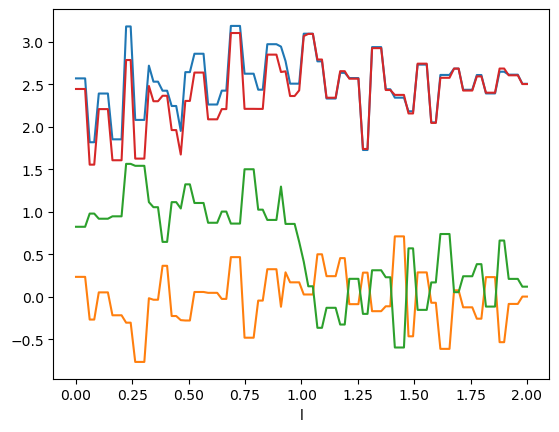

In [13]:
transports_line.mean("time").Qx.plot()
transports_line.mean("time").Qy.plot()
Q_paralllel.mean("time").plot()
Q_across.mean("time").plot()

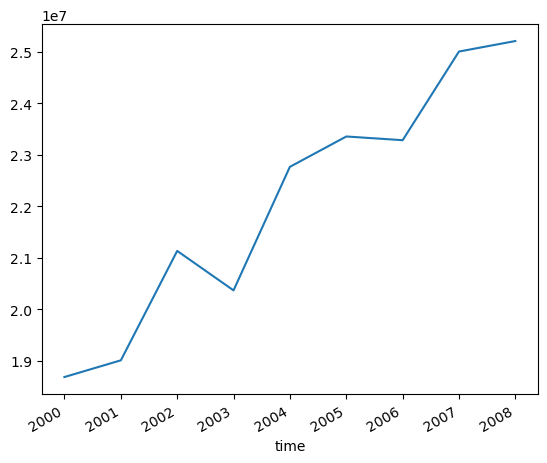

In [14]:
Q_across_integrated = (Q_across * line_dists).sum("l")  # handle edge??
Q_across_integrated.plot()